In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 8, 'max_rows', 10, 'max_colwidth', 12)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
mkdir tmp

하위 디렉터리 또는 파일 tmp이(가) 이미 있습니다.


# 탐색적 데이터 분석
---
- 요악 통계량 - describe()
- 열의 데이터 형식
- category data
- 연속 데이터
- 범주간의 연속 값 비교
- 두 개의 연속 열 비교
- 범주 값과 범주 값 비교
- pandas 프로파일링 라이브러리

## 요약 통계량
---
평균, 분위수, 표준편차   
descrtbe()로 한번에

In [3]:
#low_memory = False는 파일의 정보를 누락없이 가져온다.(칼럼값의 데이터 타입이 다르면 에러가 나기 때문)

fueleco = pd.read_csv('vehicles.csv.zip',low_memory=False)
fueleco.head()

,barrels08,barrelsA08,charge120,charge240,...,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,...,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,...,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,...,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,...,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,...,NaN,0,0,0


In [4]:
# mean(), max(), quantile([0,.25,.5,.75,1]), std()
fueleco.mean()
# fueleco.max()
# fueleco.std()

barrels08         17.442712
barrelsA08         0.219276
charge120          0.000000
charge240          0.029630
city08            18.077799
                   ...     
youSaveSpend   -3459.572645
charge240b         0.005869
phevCity           0.094703
phevHwy            0.094269
phevComb           0.094141
Length: 60, dtype: float64

In [5]:
# 전체 통계
fueleco.describe().T
# include : datatype를 제한하여 통계
# fueleco.describe(include = object).T
# exclude도 가능
# fueleco.describe(exclude = int).T

,count,mean,std,min,25%,50%,75%,max
barrels08,39101.0,17.442712,4.580230,0.06,14.33087,17.347895,20.115,47.087143
barrelsA08,39101.0,0.219276,1.143837,0.00,0.00000,0.000000,0.000,18.311667
charge120,39101.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000,0.000000
charge240,39101.0,0.029630,0.487408,0.00,0.00000,0.000000,0.000,12.000000
city08,39101.0,18.077799,6.970672,6.00,15.00000,17.000000,20.000,150.000000
...,...,...,...,...,...,...,...,...
youSaveSpend,39101.0,-3459.572645,3010.284617,-26500.00,-4750.00000,-3500.000000,-1500.000,5250.000000
charge240b,39101.0,0.005869,0.165399,0.00,0.00000,0.000000,0.000,7.000000
phevCity,39101.0,0.094703,2.279478,0.00,0.00000,0.000000,0.000,97.000000
phevHwy,39101.0,0.094269,2.191115,0.00,0.00000,0.000000,0.000,81.000000


## 열의 데이터 형식

In [6]:
# 세로방향
fueleco.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [7]:
# 가로방향
fueleco.dtypes.value_counts()

float64    32
int64      27
object     23
bool        1
dtype: int64

In [8]:
# int64 타입만 select
fueleco.select_dtypes('int64').describe()

,city08,cityA08,co2,co2A,...,youSaveSpend,phevCity,phevHwy,phevComb
count,39101.00...,39101.00...,39101.00...,39101.00...,...,39101.00...,39101.00...,39101.00...,39101.00...
mean,18.077799,0.569883,72.538989,5.543950,...,-3459.572645,0.094703,0.094269,0.094141
std,6.970672,4.297124,163.252019,55.956932,...,3010.284617,2.279478,2.191115,2.226500
min,6.000000,0.000000,-1.000000,-1.000000,...,-26500.00...,0.000000,0.000000,0.000000
25%,15.000000,0.000000,-1.000000,-1.000000,...,-4750.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,-1.000000,-1.000000,...,-3500.000000,0.000000,0.000000,0.000000
75%,20.000000,0.000000,-1.000000,-1.000000,...,-1500.000000,0.000000,0.000000,0.000000
max,150.000000,145.000000,847.000000,713.000000,...,5250.000000,97.000000,81.000000,88.000000


### 메모리 줄이기

In [10]:
np.iinfo(np.int8)
# np.iinfo(np.int16)

iinfo(min=-128, max=127, dtype=int8)

In [11]:
# city07 과 comb08은 150을 넘지 않는다.
# int 64 => 적절한 용량의 int로 변환
fueleco[['city08', 'comb08']].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int64
 1   comb08  39101 non-null  int64
dtypes: int64(2)
memory usage: 611.1 KB


In [12]:
# assign : 데이터 합치기(열 형식 데이터)
# astype : 데이터 변환
# 데이터가 줄어듦
fueleco[['city08', 'comb08']].assign(
    city08=fueleco.city08.astype(np.int16),
    comb08=fueleco.comb08.astype(np.int16)).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int16
 1   comb08  39101 non-null  int16
dtypes: int16(2)
memory usage: 152.9 KB


In [13]:
# assign 예시)
test_df = pd.DataFrame({'A': [1, 2, 3]})

test_df.assign(B=test_df.A, C=lambda x:x['A']+ x['B'])

,A,B,C
0,1,1,2
1,2,2,4
2,3,3,6


In [14]:
# category로 변환 : 중복도가 높은 object는 category로 변환하면 메모리 절약
# category : 중복되는 문자열을 저장하여 그 주소값을 불러오기 때문에 메모리 절약

# 중복도가 낮으면 카디널리티가 높다라고 표현
# ex) : 학점, 성별, 영화장르 등등


import sys
print(sys.getsizeof('안'))
print(sys.getsizeof('녕'))
print(sys.getsizeof('하'))
print(sys.getsizeof('세'))
print(sys.getsizeof('요'))

76
76
76
76
76


In [57]:
print(sys.getsizeof('안녕하세요'))

84


In [15]:
# 고유한 값의 수 nunique()
# nunique() = len(unique())
fueleco.make.nunique()

134

In [16]:
fueleco[['model']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   39101 non-null  object
dtypes: object(1)
memory usage: 305.6+ KB


In [17]:
fueleco[['make']].assign(make=fueleco.make.astype('category')).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   make    39101 non-null  category
dtypes: category(1)
memory usage: 81.6 KB


In [18]:
fueleco[['model']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   39101 non-null  object
dtypes: object(1)
memory usage: 305.6+ KB


In [19]:
fueleco[['model']].assign(model=fueleco.model.astype('category')).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   model   39101 non-null  category
dtypes: category(1)
memory usage: 235.3 KB


## Categorical Data (범주형 데이터)

In [20]:
fueleco.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [21]:
# 카디럴리티 확인
fueleco.drive.nunique()

7

In [22]:
# 무작위로 5개를 뽑는데 random_state : 여러번 실행해도 값이 바뀌지 않는다
# random_state=num : num마다 고유 값이 정해져 있음
fueleco.drive.sample(5, random_state=42)

4217     4-Wheel ...
1736     4-Wheel ...
36029    Rear-Whe...
37631    Front-Wh...
1668     Rear-Whe...
Name: drive, dtype: object

In [23]:
# 결측치 %
fueleco.drive.isna().mean() * 100

3.0408429451932175

In [24]:
fueleco.make.value_counts().index[:6]

Index(['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Toyota', 'BMW'], dtype='object')

<AxesSubplot:>

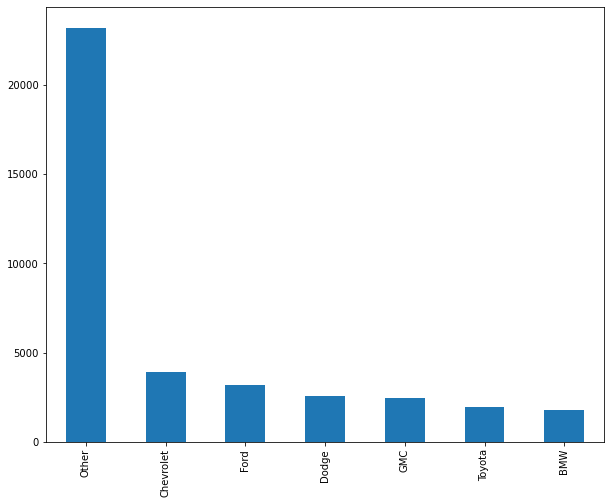

In [25]:
# bar plot
# 열을 요약해 상위 6개만 그래프 화
# fueleco.make.value_counts()

fig, ax = plt.subplots(figsize=(10, 8))

# where(조건, other=NaN) : 조건에 포함되지 않으면 NaN값으로 변경

top_n = fueleco.make.value_counts().index[:6]
(fueleco.assign(make=fueleco.make.where(fueleco.make.isin(top_n),
              'Other')).make.value_counts().plot.bar(ax=ax))

<AxesSubplot:xlabel='count', ylabel='make'>

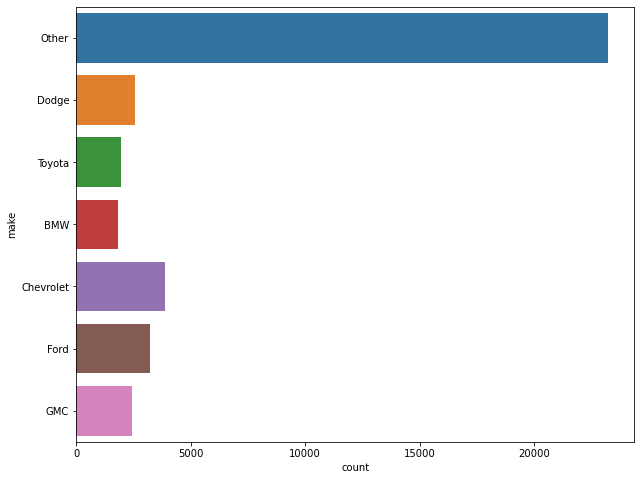

In [26]:
# seaborn ver

fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
sns.countplot(y='make',data= (fueleco.assign(make=fueleco.make.where(fueleco.make.isin(top_n),'Other'))))

In [27]:
# category형 변수를 검사 할 때는 결측치를 확인하자
# type 변환을 할 때 에러가 날 수 있기 때문
fueleco.drive.value_counts()

Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: drive, dtype: int64

In [82]:
fueleco.drive.value_counts(dropna=False)

Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: drive, dtype: int64

## 연속 데이터

In [67]:
fueleco.select_dtypes('number')

,barrels08,barrelsA08,...,phevHwy,phevComb
0,15.695714,0.0,...,0,0
1,29.964545,0.0,...,0,0
2,12.207778,0.0,...,0,0
3,29.964545,0.0,...,0,0
4,17.347895,0.0,...,0,0
...,...,...,...,...,...
39096,14.982273,0.0,...,0,0
39097,14.330870,0.0,...,0,0
39098,15.695714,0.0,...,0,0
39099,15.695714,0.0,...,0,0


In [68]:
fueleco.city08.sample(5, random_state=42)

4217     11
1736     21
36029    16
37631    16
1668     17
Name: city08, dtype: int64

In [69]:
fueleco.city08.isna().sum()

0

In [70]:
fueleco.city08.describe()

count    39101.00...
mean       18.077799
std         6.970672
min         6.000000
25%        15.000000
50%        17.000000
75%        20.000000
max       150.000000
Name: city08, dtype: float64

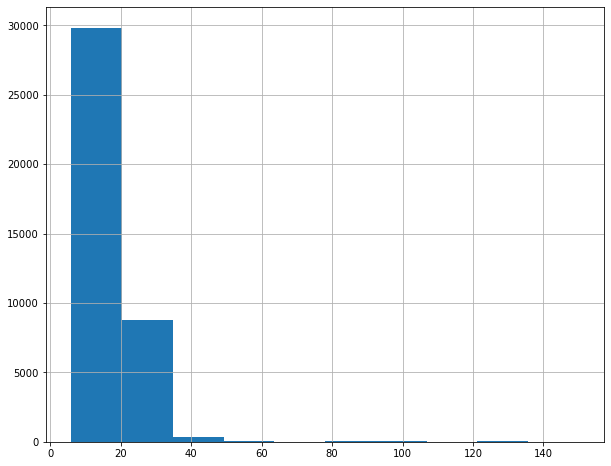

In [72]:
# histogram
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.city08.hist(ax=ax)


<AxesSubplot:>

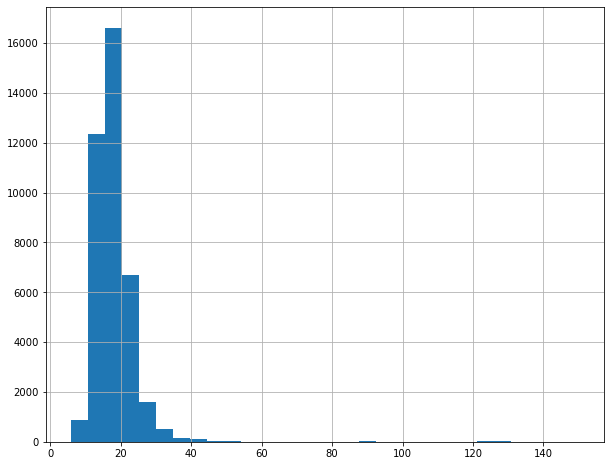

In [66]:
# bins의 갯수를 증가시킴 (히스토그램의 한 구간)

fig, ax = plt.subplots(figsize=(10, 8))
fueleco.city08.hist(ax=ax, bins=30)

<AxesSubplot:xlabel='city08', ylabel='Density'>

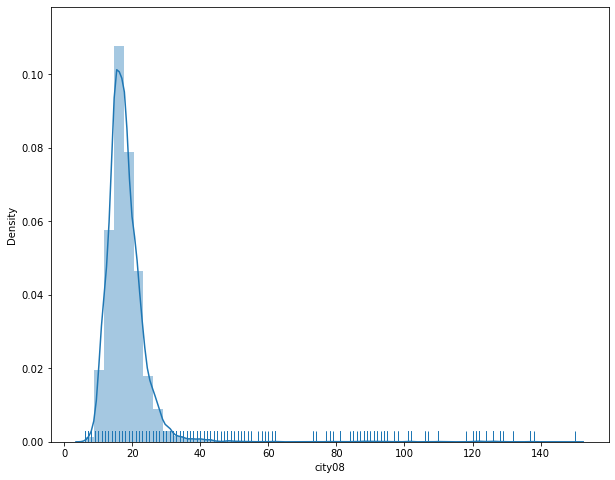

In [68]:
# seaborn 버전

fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(fueleco.city08, rug=True, ax=ax)

<AxesSubplot:xlabel='city08'>

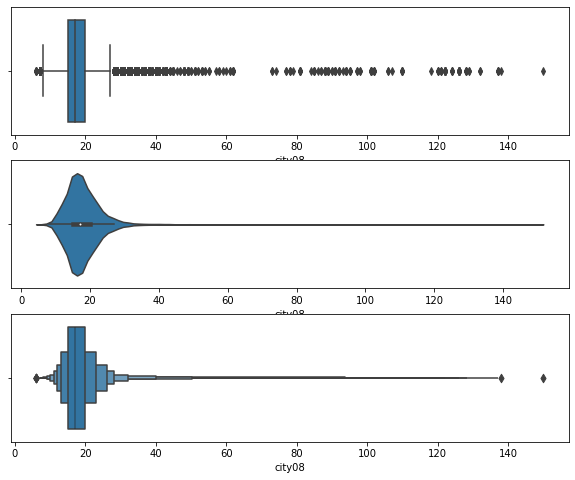

In [69]:
# seaborn의 box plot, boxen plot, violin plot

fig, axs = plt.subplots(nrows=3, figsize=(10, 8))
sns.boxplot(fueleco.city08, ax=axs[0])
sns.violinplot(fueleco.city08, ax=axs[1])
sns.boxenplot(fueleco.city08, ax=axs[2])
 

In [29]:
# 콜모고로프스미르노프 검증 (두 집단의 관계성)
# cdf = 'norm' : 정규분포와 상관관계가 있는지 확인
from scipy import stats
stats.kstest(fueleco.city08, cdf='norm')

KstestResult(statistic=0.9999999990134123, pvalue=0.0)

((array([-4.1352692 , -3.92687024, -3.81314873, ...,  3.81314873,
          3.92687024,  4.1352692 ]),
  array([  6,   6,   6, ..., 137, 138, 150], dtype=int64)),
 (5.385946629915967, 18.077798521776934, 0.7725879414597128))

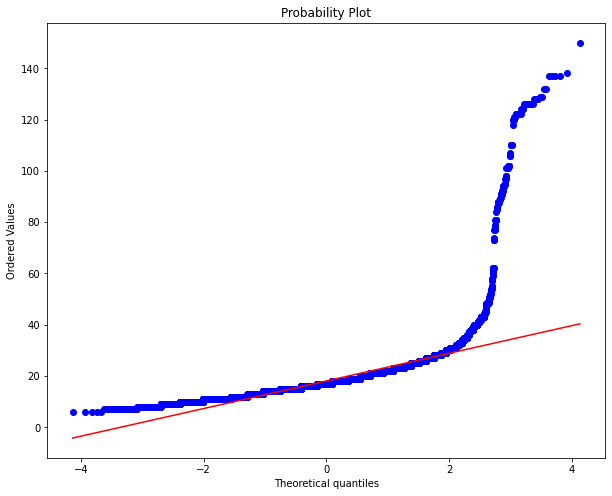

In [30]:
# probplot
# 정규분포 표를 따르는지 확인
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(fueleco.city08, plot=ax)  

## 범주간의 연속 값 비교

In [31]:
# 평균과 표준편차
# groupby().agg(함수) : 객체에 함수를 적용
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])
fueleco[mask].groupby('make').city08.agg(['mean', 'std'])

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


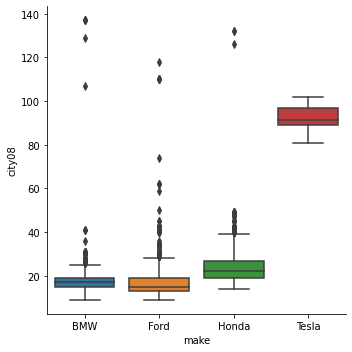

In [32]:
# seaborn으로 시각화
# catplot
g = sns.catplot(x='make', y='city08',data=fueleco[mask], kind='box')

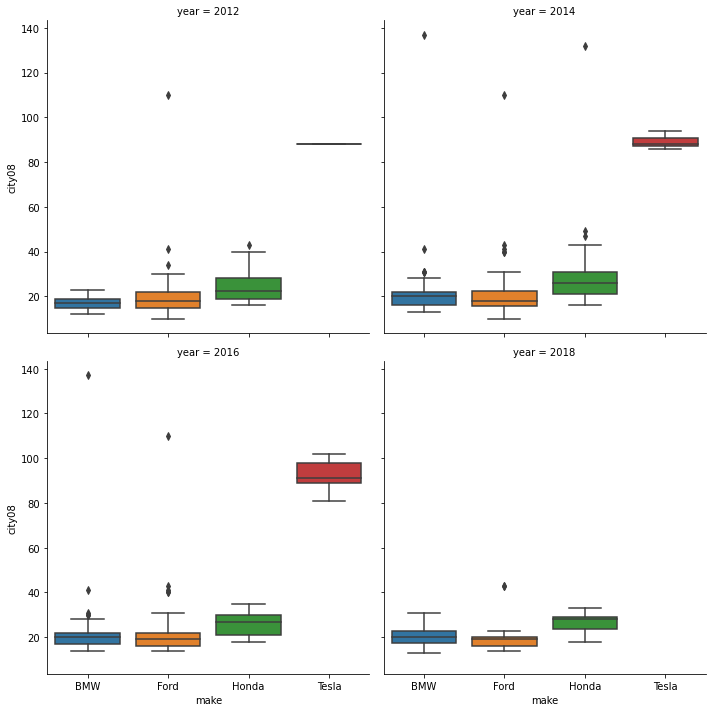

In [87]:
# col 매개변수를 사용하면 도표를 나눌 수 있다.
g = sns.catplot(x='make', y='city08', data=fueleco[mask], kind='box',col='year',
                col_order=[2012, 2014, 2016, 2018],col_wrap=2)


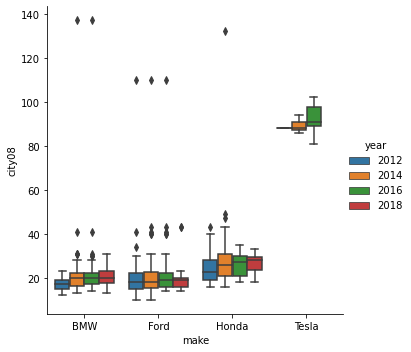

In [89]:
# hue 매개변수를 사용하면 col을 사용한 것 처럼 그래프를 나눌 필요없이 한번에 나타낼 수 있다.
g = sns.catplot(x='make', y='city08',data=fueleco[mask], kind='box',
                hue='year', hue_order=[2012, 2014, 2016, 2018])

In [91]:
# style.background_gradient(cmap='RdBu', axis=0)) 출력 스타일 지정
# 강조 할 수 있다.
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])
(fueleco[mask].groupby('make').city08.agg(['mean', 'std'])
 .style.background_gradient(cmap='RdBu', axis=0))

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


## 두개의 연속 열 비교

In [92]:
# 공분산 : 수치가 높을 수록 두 변수간의 관계가 높다
fueleco.city08.cov(fueleco.highway08)

46.333260236736244

In [93]:
fueleco.city08.cov(fueleco.comb08)

47.41994667819078

In [94]:
fueleco.city08.cov(fueleco.cylinders)

-5.931560263764761

In [95]:
# 피어슨 상관계수 : 공분산을 -1 ~ 1사이의 수로 변환
fueleco.city08.corr(fueleco.highway08)

0.9324945062284952

In [96]:
fueleco.city08.corr(fueleco.cylinders)

-0.7016548423827886

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_11724/1652357687.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

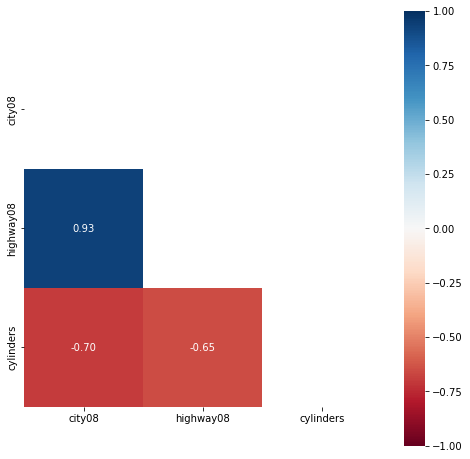

In [98]:
# seaborn으로 도식화
# corr() : 상관계수를 보여준다.

# np.zeros_like : 변수의 크기만큼 0을 가진 array를 만들어 준다.
# np.zeros_like([1,2,3,4]) == np.array[0,0,0,0]
# dtype=np.bool : False로 채워준다


fig, ax = plt.subplots(figsize=(8,8))
corr = fueleco[['city08', 'highway08', 'cylinders']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
# 모듈로 위 쪽 삼각형에 True, 아래 삼각형에 False를 실행합니다(heatmap plot을 그릴 때 사용되는 함수)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,
    fmt='.2f', annot=True, ax=ax, cmap='RdBu', vmin=-1, vmax=1,
    square=True)


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_11724/1303275060.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

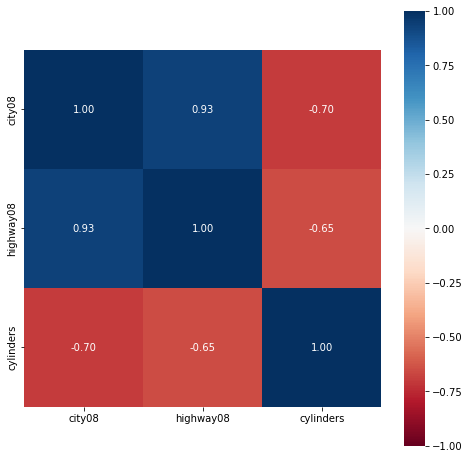

In [109]:
# mask[np.triu_indices_from(mask)] = True 없을 때
fig, ax = plt.subplots(figsize=(8,8))
corr = fueleco[['city08', 'highway08', 'cylinders']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
sns.heatmap(corr, mask=mask,
    fmt='.2f', annot=True, ax=ax, cmap='RdBu', vmin=-1, vmax=1,
    square=True)

<AxesSubplot:xlabel='city08', ylabel='highway08'>

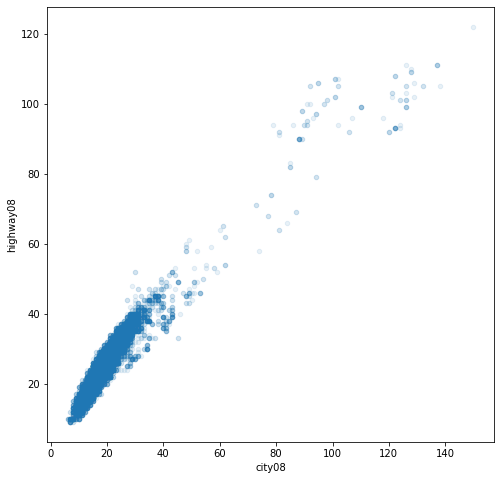

In [111]:
# pandas로 산포도
fig, ax = plt.subplots(figsize=(8,8))
fueleco.plot.scatter(x='city08', y='highway08', alpha=.1, ax=ax)

<AxesSubplot:xlabel='city08', ylabel='cylinders'>

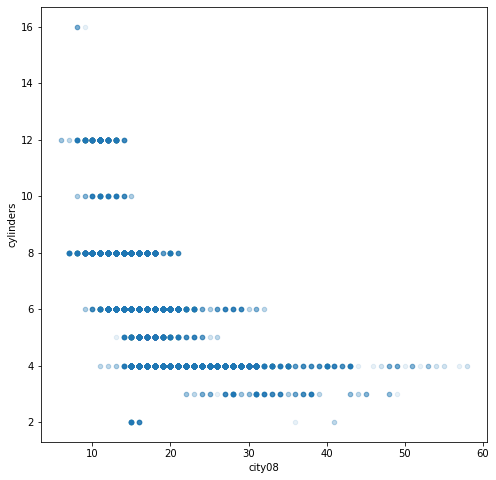

In [112]:
fig, ax = plt.subplots(figsize=(8,8))
fueleco.plot.scatter(x='city08', y='cylinders', alpha=.1, ax=ax)

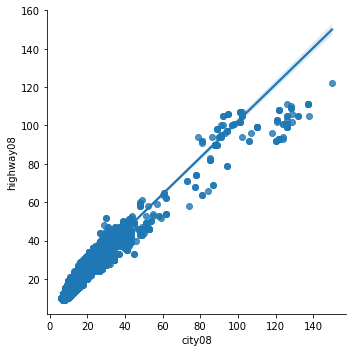

In [113]:
# Regresson을 추가
res = sns.lmplot(x='city08', y='highway08', data=fueleco)

In [ ]:
# 도시 마일리지와 고속도로 마일리지사이의 강한 관계가 있다

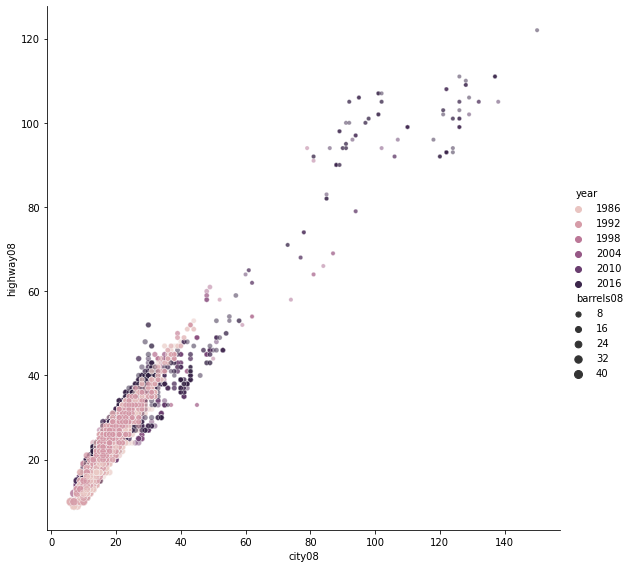

In [117]:
# 변수 비교를 위해 hue사용
res = sns.relplot(x='city08', y='highway08',
   data=fueleco.assign(
       cylinders=fueleco.cylinders.fillna(0)),
   hue='year', size='barrels08', alpha=.5, height=8)

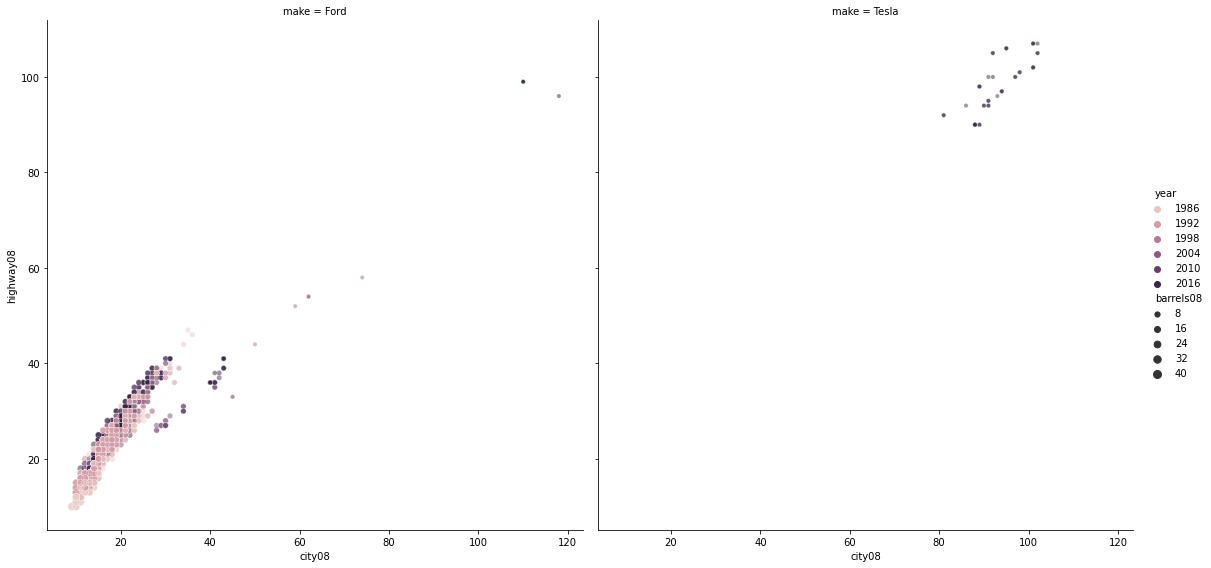

In [118]:
res = sns.relplot(x='city08', y='highway08',
  data=fueleco.assign(
  cylinders=fueleco.cylinders.fillna(0)),
  hue='year', size='barrels08', alpha=.5, height=8,
  col='make', col_order=['Ford', 'Tesla'])

In [147]:
~123

-124

## 범주 값과 범주 값 비교

In [42]:
# ser : 칼럼 , match_name : 2개의 value

def generalize(ser, match_name, default):
    seen = None
    for match, name in match_name:
        # mask = ser에서 march를 포함하는 value 갯수
        mask = ser.str.contains(match)
        if seen is None:
            seen = mask
        # 이진수 OR연산
        else:
            seen |= mask
        # where(조건, other=name) : 조건에 포함되지 않으면 name값으로 변경
        ser = ser.where(~mask, name)
    ser = ser.where(seen, default)
    return ser

In [43]:
makes = ['Ford', 'Tesla', 'BMW', 'Toyota']
# SClass라는 column을 만들어 합친다
data = (fueleco [fueleco.make.isin(makes)].assign(SClass=lambda df_: generalize(df_.VClass,[('Seaters', 'Car'), ('Car', 'Car'), ('Utility', 'SUV'),
     ('Truck', 'Truck'), ('Van', 'Van'), ('van', 'Van'), ('Wagon', 'Wagon')], 'other')))
data

,barrels08,barrelsA08,charge120,charge240,...,phevCity,phevHwy,phevComb,SClass
7,13.733750,0.0,0.0,0.0,...,0,0,0,Car
8,12.677308,0.0,0.0,0.0,...,0,0,0,Car
9,13.184400,0.0,0.0,0.0,...,0,0,0,Car
10,12.677308,0.0,0.0,0.0,...,0,0,0,Car
20,20.600625,0.0,0.0,0.0,...,0,0,0,Car
...,...,...,...,...,...,...,...,...,...
39014,10.987000,0.0,0.0,0.0,...,0,0,0,Car
39015,15.695714,0.0,0.0,0.0,...,0,0,0,Car
39016,13.733750,0.0,0.0,0.0,...,0,0,0,Car
39017,17.347895,0.0,0.0,0.0,...,0,0,0,Car


In [44]:
data.groupby(['make', 'SClass']).size().unstack()

SClass,Car,SUV,Truck,Van,Wagon,other
make,,,,,,
BMW,1557.0,158.0,NaN,NaN,92.0,NaN
Ford,1075.0,372.0,1040.0,332.0,155.0,234.0
Tesla,36.0,10.0,NaN,NaN,NaN,NaN
Toyota,773.0,376.0,478.0,94.0,132.0,123.0


In [45]:
# unique한 value끼리 1 대 1 대응시켜서 값이 없으면 0
pd.crosstab(data.make, data.SClass)

SClass,Car,SUV,Truck,Van,Wagon,other
make,,,,,,
BMW,1557,158,0,0,92,0
Ford,1075,372,1040,332,155,234
Tesla,36,10,0,0,0,0
Toyota,773,376,478,94,132,123


In [68]:
# crosstab 예시
a = {'test1': [1,3,2,2,5], 'test2': [1,1,1,1,2]}
a = pd.DataFrame(a)
tbl = pd.crosstab(a.test1,a.test2)
tbl

test2,1,2
test1,,
1,1,0
2,2,0
3,1,0
5,0,1


In [47]:
# crosstab([index1, index2], [column1,column2])
pd.crosstab([data.year, data.make], [data.SClass, data.VClass])

SClass               Car                                           ...  \
VClass      Compact Cars Large Cars Midsize Cars Minicompact Cars  ...   
year make                                                          ...   
1984 BMW               6          0            0            0      ...   
     Ford             33          3            9            0      ...   
     Toyota           13          0            0            3      ...   
1985 BMW               7          0            0            0      ...   
     Ford             31          2            5            0      ...   
...                  ...        ...          ...          ...      ...   
2017 Tesla             0          8            0            0      ...   
     Toyota            3          0           16            2      ...   
2018 BMW              37         12            5            0      ...   
     Ford              0          0            8            0      ...   
     Toyota            4          0           16            0      ...   

SClass                     Wagon                       other  \
VClass      Small Station Wagons Special Purpose Vehicle 2WD   
year make                                                      
1984 BMW               0                    0                  
     Ford             12                    0                  
     Toyota           10                    0                  
1985 BMW               0                    0                  
     Ford             13                    5                  
...                  ...                  ...                  
2017 Tesla             0                    0                  
     Toyota            0                    0                  
2018 BMW               2                    0                  
     Ford              0                    6                  
     Toyota            0                    0                  

SClass                                                            
VClass      Special Purpose Vehicle 4WD Special Purpose Vehicles  
year make                                                         
1984 BMW               0                           0              
     Ford             21                           6              
     Toyota            3                           2              
1985 BMW               0                           0              
     Ford              9                           6              
...                  ...                         ...              
2017 Tesla             0                           0              
     Toyota            0                           0              
2018 BMW               0                           0              
     Ford              0                           0              
     Toyota            0                           0              

[111 rows x 29 columns]

In [48]:
# cramers 척도 (상관관계를 분석해 준다.)

import scipy.stats as ss
import numpy as np
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    # chi2_contingency : 카이제곱 분포
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [49]:
cramers_v(data.make, data.SClass)

0.2859720982171866

In [59]:
data.make.corr(data.SClass, cramers_v)

0.2859720982171866

generalize 함수를 사용하여 카디널리티를 낮춰 막대 그래프의 간격을 넓혔다

<AxesSubplot:xlabel='make'>

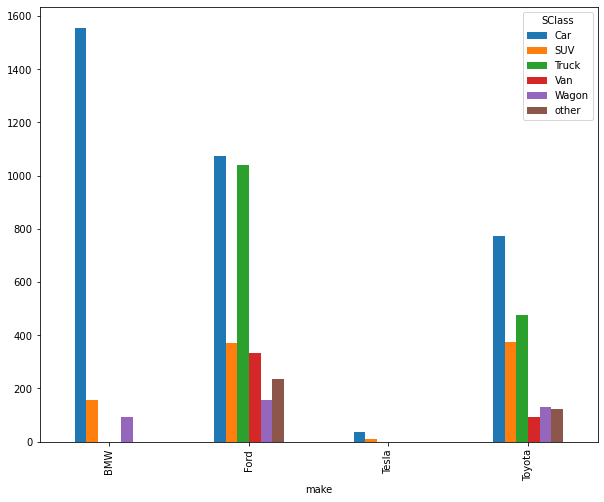

In [53]:
# subplot
fig, ax = plt.subplots(figsize=(10,8))
(data.pipe(lambda x : pd.crosstab(x.make, x.SClass)).plot.bar(ax=ax))

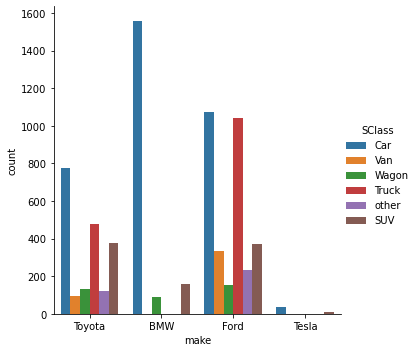

In [52]:
# seaborn
res = sns.catplot(kind='count',x='make', hue='SClass', data=data)

<AxesSubplot:xlabel='make'>

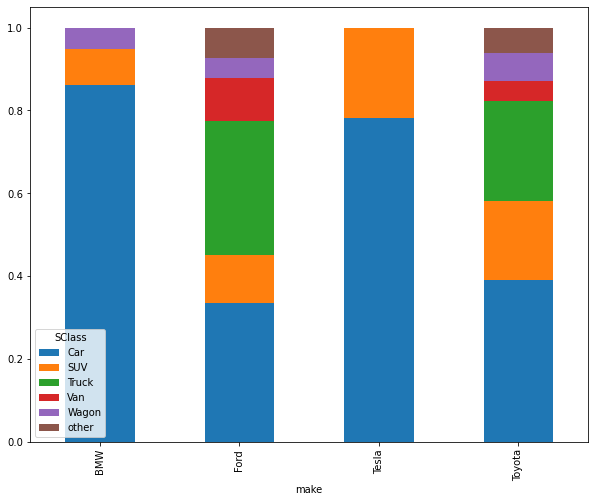

In [54]:
# 겹쳐서 그리기
fig, ax = plt.subplots(figsize=(10,8))
(data.pipe(lambda df_: pd.crosstab(df_.make, df_.SClass))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.bar(stacked=True, ax=ax))

## 프로파일링 라이브러리

In [66]:
!pip install -U pandas-profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached phik-0.12.0-cp39-cp39-win_amd64.whl (659 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached pydantic-1.9.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [ ]:
report = pp.ProfileReport(fueleco)
report.to_file('/tmp/fuel.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]